### 2.3 Data Exploration

In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

dch = pd.read_csv('Obesity_among_children_and_adolescents.csv')
dad = pd.read_csv('Normal_weight_overweight_and_obesity_among_adults.csv')
plt.rcParams.update({'font.size': 8})

Data $Obesity\_among\_children\_and\_adolescents$

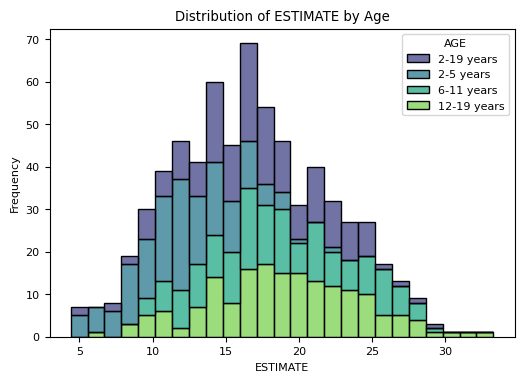

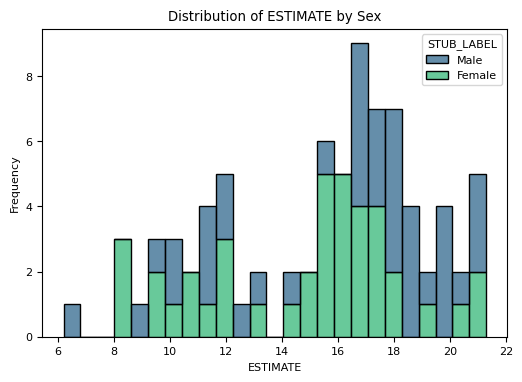

In [500]:
plt.figure(figsize=(6, 4))
sns.histplot(data=dch, x='ESTIMATE', hue='AGE', palette='viridis',bins=25,multiple='stack',legend=True)#, kde=True
plt.title('Distribution of ESTIMATE by Age')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

#filter
dch_sex = dch[dch['STUB_NAME'] == 'Sex']
plt.figure(figsize=(6, 4))
sns.histplot(data=dch_sex, x='ESTIMATE', hue='STUB_LABEL', palette='viridis',bins=25,multiple='stack',legend=True)
plt.title('Distribution of ESTIMATE by Sex')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

Data $Normal\_weight\_overweight\_and\_obesity\_among\_adults$

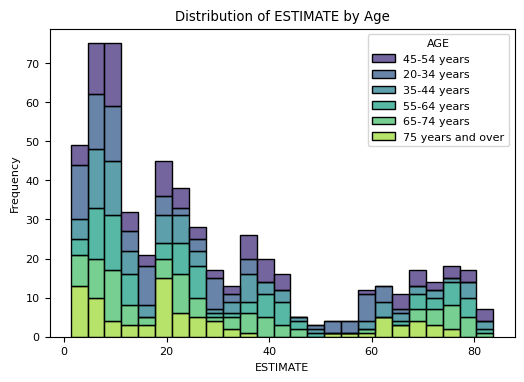

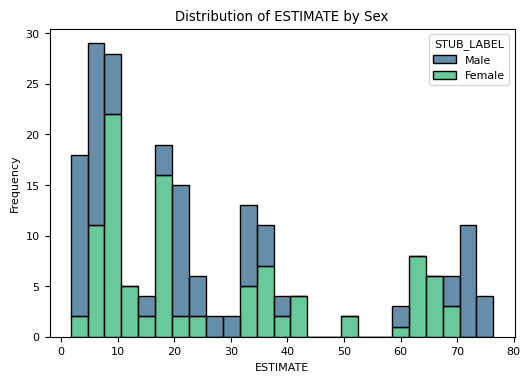

In [501]:
dad_ob = dad[dad['PANEL'] != "Normal weight (BMI from 18.5 to 24.9)"]
dad_age = dad_ob[dad_ob['AGE'] != "20 years and over"]
plt.figure(figsize=(6, 4))
sns.histplot(data=dad_age, x='ESTIMATE', hue='AGE', palette='viridis',bins=25,multiple='stack',legend=True)#, kde=True
plt.title('Distribution of ESTIMATE by Age')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

#filter
dad_sex = dad_ob[dad_ob['STUB_NAME'] == 'Sex']
plt.figure(figsize=(6, 4))
sns.histplot(data=dad_sex, x='ESTIMATE', hue='STUB_LABEL', palette='viridis',bins=25,multiple='stack',legend=True)
plt.title('Distribution of ESTIMATE by Sex')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

### 2.4 Verifying Data Quality
Data $Obesity\_among\_children\_and\_adolescents$

Shape of the dataset: (840, 16)

Columns in the dataset:  Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'STUB_LABEL', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')

Types and Completeness in each column:
               Data Type  Completeness(%)  Valid Records  Null Values
INDICATOR         object       100.000000            840            0
PANEL             object       100.000000            840            0
PANEL_NUM          int64       100.000000            840            0
UNIT              object       100.000000            840            0
UNIT_NUM           int64       100.000000            840            0
STUB_NAME         object       100.000000            840            0
STUB_NAME_NUM      int64       100.000000            840            0
STUB_LABEL_NUM   float64        95.238095            800           40
STUB_LABEL        object       100.000000      

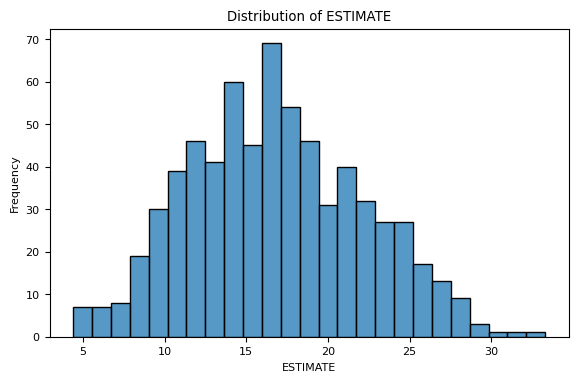

In [502]:
# Basic information
print("Shape of the dataset:", dch.shape)
print("\nColumns in the dataset: ", dch.columns)

# Types and Completeness
column_info = pd.DataFrame({
    'Data Type': dch.dtypes,
    'Completeness(%)': dch.notnull().sum() / len(dch) * 100,
    'Valid Records': dch.shape[0] - dch.isnull().sum(),
    'Null Values': dch.isnull().sum()
})
print("\nTypes and Completeness in each column:")
print(column_info)

# Outliers and Extreme
def detect_outliers_extremes(col, threshold=3):
    #values beyond 3 standard deviations from the mean
    
    mean_val = col.mean()
    std_dev = col.std()
    
    lower_threshold = mean_val - threshold * std_dev
    upper_threshold = mean_val + threshold * std_dev
    
    outliers = col[(col < lower_threshold) | (col > upper_threshold)]
    
    return outliers.values
print("\n")
print(f"Outliers in column ESTIMATE: {detect_outliers_extremes(dch['ESTIMATE'])}")
print(f"Outliers in column SE: {detect_outliers_extremes(dch['SE'])}")

plt.figure(figsize=(6.7, 4))
sns.histplot(data=dch, x='ESTIMATE', palette='viridis',bins=25)
plt.title('Distribution of ESTIMATE')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

Data $Normal\_weight\_overweight\_and\_obesity\_among\_adults$

Shape of the dataset: (3360, 16)

Columns in the dataset:  Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')

Types and Completeness in each column:
               Data Type  Completeness(%)  Valid Records  Null Values
INDICATOR         object       100.000000           3360            0
PANEL             object       100.000000           3360            0
PANEL_NUM          int64       100.000000           3360            0
UNIT              object       100.000000           3360            0
UNIT_NUM           int64       100.000000           3360            0
STUB_NAME         object       100.000000           3360            0
STUB_NAME_NUM      int64       100.000000           3360            0
STUB_LABEL        object       100.000000           3360            0
STUB_LABEL_NUM   float64       100.000000     

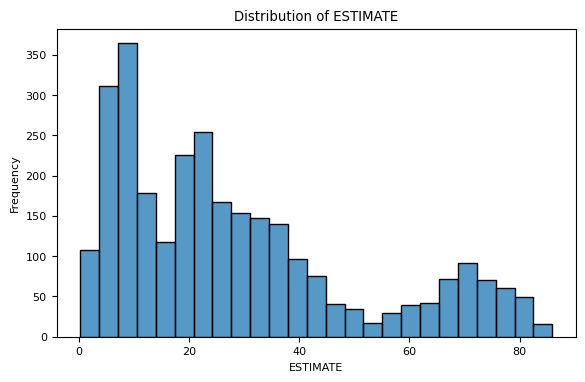

In [503]:
# Basic information
print("Shape of the dataset:", dad.shape)
print("\nColumns in the dataset: ", dad.columns)

# Types and Completeness
column_info = pd.DataFrame({
    'Data Type': dad.dtypes,
    'Completeness(%)': dad.notnull().sum() / len(dad) * 100,
    'Valid Records': dad.shape[0] - dad.isnull().sum(),
    'Null Values': dad.isnull().sum()
})
print("\nTypes and Completeness in each column:")
print(column_info)

# Outliers and Extreme
def detect_outliers_extremes(col, threshold=3):
    #values beyond 3 standard deviations from the mean
    
    mean_val = col.mean()
    std_dev = col.std()
    
    lower_threshold = mean_val - threshold * std_dev
    upper_threshold = mean_val + threshold * std_dev
    
    outliers = col[(col < lower_threshold) | (col > upper_threshold)]
    
    return outliers.values
print("\n")
print(f"Outliers in column ESTIMATE: {detect_outliers_extremes(dad['ESTIMATE'])}")
print(f"Outliers in column SE: {detect_outliers_extremes(dad['SE'])}")

plt.figure(figsize=(6.7, 4))
sns.histplot(data=dad, x='ESTIMATE', palette='viridis',bins=25)
plt.title('Distribution of ESTIMATE')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

### 3.2 Data Cleaning
Data $Obesity\_among\_children\_and\_adolescents$

In [504]:
# missings, outliers
pre_dch = dch.dropna(subset=['ESTIMATE','STUB_LABEL_NUM'])  
pre_dch = pre_dch[pre_dch['SE'] != 4.5] # Large SE

# Irrelevant Features/Records and Duplicates
pre_dch = pre_dch.drop(columns=['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'FLAG'])
pre_dch = pre_dch.drop_duplicates()

# Check cleaned data
pre_dch.shape

(632, 9)

Data $Normal\_weight\_overweight\_and\_obesity\_among\_adults$

In [505]:
# missings, outliers
pre_dad = dad_ob.dropna(subset=['ESTIMATE','STUB_LABEL_NUM']) 

# Irrelevant Features/Records and Duplicates
pre_dad = pre_dad.drop(columns=['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM', 'FLAG'])
pre_dad = pre_dad.drop_duplicates()

# Check cleaned data
pre_dad.shape

(2411, 9)

### 3.3 Data Integration

In [506]:
pre_data = pd.concat([pre_dch, pre_dad], axis=0, ignore_index=True)

# Check inregrated data
pre_data.shape

(3043, 9)

### 3.4 Constructing/Deriving a New Feature

In [507]:
pre_data.rename(columns={'PANEL': 'INFO'}, inplace=True)
pre_data['YEAR_proxy'] = pd.to_datetime(pre_data['YEAR'].str.split('-').str[0])
pre_data['STUB_LABEL_Derive'] = pre_data['STUB_NAME'] + ": " + pre_data['STUB_LABEL']
pre_data['IS_ADULT'] = np.where(pre_data['INDICATOR'] == 'Normal weight, overweight, and obesity among adults aged 20 and over', True, False)

### 3.5 Formatting Data

In [508]:
pre_data = pre_data.drop(columns=['INDICATOR','STUB_NAME','STUB_LABEL','SE'])
category_columns = pre_data.columns.difference(['ESTIMATE', 'YEAR_proxy'])
pre_data[category_columns] = pre_data[category_columns].astype('category')

pre_data.to_csv('prepared_data.csv', index=False)
print('Column Types:')
print(pre_data.dtypes)

Column Types:
INFO                       category
UNIT                       category
YEAR                       category
AGE                        category
ESTIMATE                    float64
YEAR_proxy           datetime64[ns]
STUB_LABEL_Derive          category
IS_ADULT                   category
dtype: object


## 4.1 Data Reducion

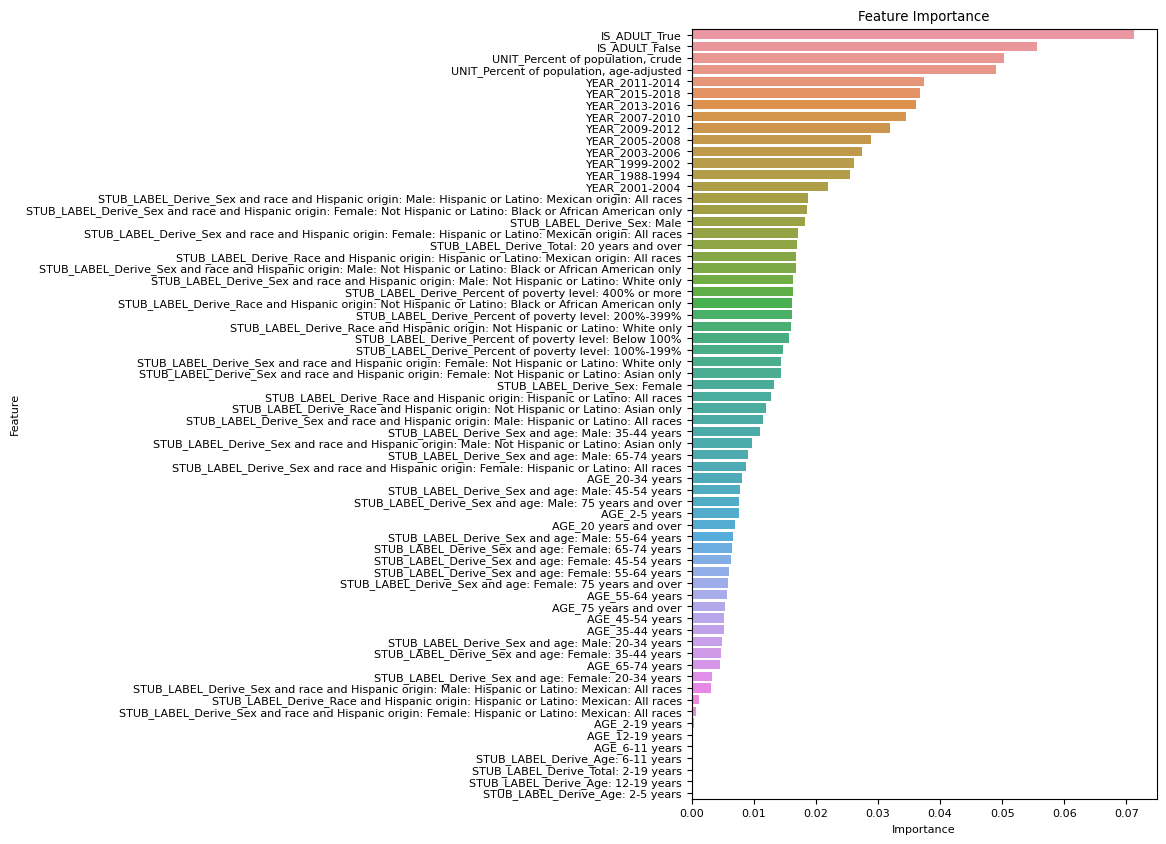

In [509]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features = pre_data.drop(['ESTIMATE', 'YEAR_proxy','INFO'], axis=1) 
features_encoded = pd.get_dummies(features)

target = pre_data['ESTIMATE']

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features_encoded.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#print(feature_importance_df)
plt.figure(figsize=(6, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


## 4.2 Data Projection

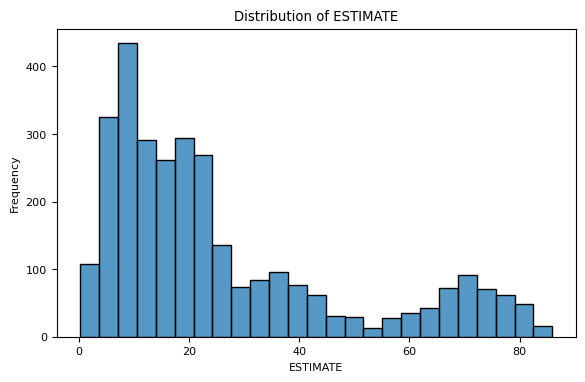

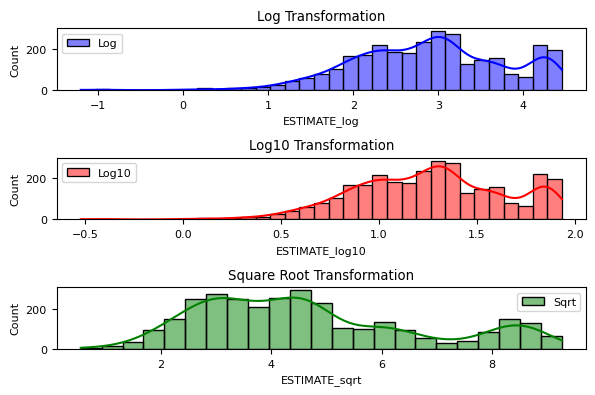

In [510]:
pre_data['ESTIMATE_log'] = np.log(pre_data['ESTIMATE'])
pre_data['ESTIMATE_log10'] = np.log10(pre_data['ESTIMATE'])
pre_data['ESTIMATE_sqrt'] = np.sqrt(pre_data['ESTIMATE'])

plt.figure(figsize=(6.7, 4))
sns.histplot(data=pre_data, x='ESTIMATE', palette='viridis',bins=25)
plt.title('Distribution of ESTIMATE')
plt.xlabel('ESTIMATE')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))

plt.subplot(3, 1, 1)
sns.histplot(pre_data['ESTIMATE_log'], kde=True, label='Log', color='blue', alpha=0.5)
plt.title('Log Transformation')
plt.legend()

plt.subplot(3, 1, 2)
sns.histplot(pre_data['ESTIMATE_log10'], kde=True, label='Log10', color='red', alpha=0.5)
plt.title('Log10 Transformation')
plt.legend()

plt.subplot(3, 1, 3)
sns.histplot(pre_data['ESTIMATE_sqrt'], kde=True, label='Sqrt', color='green', alpha=0.5)
plt.title('Square Root Transformation')
plt.legend()

plt.tight_layout()
plt.show()

pre_data = pre_data.drop(columns=['ESTIMATE_log','ESTIMATE_log10'])
pre_data.to_csv('transformed_data.csv', index=False)


## 6.3 Build/Select Model with Algorithm/Model Parameters

In [511]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

ts_data = pre_data.groupby('YEAR_proxy')['ESTIMATE_sqrt'].mean().reset_index()
ts_data.set_index('YEAR_proxy', inplace=True)  

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore")
for params in pdq:
    try:
        model = ARIMA(ts_data, order=params)
        results = model.fit()
        print('ARIMA{} - AIC:{}'.format(params, results.aic))
    except:
        continue
warnings.resetwarnings()

ARIMA(0, 0, 0) - AIC:3.9773219649667713
ARIMA(0, 0, 1) - AIC:3.2003999940000636
ARIMA(0, 0, 2) - AIC:3.253714726993329
ARIMA(0, 1, 0) - AIC:-3.363875885466949
ARIMA(0, 1, 1) - AIC:-1.9465297799470411
ARIMA(0, 1, 2) - AIC:-0.9922184330469141
ARIMA(0, 2, 0) - AIC:-3.7638801514346376
ARIMA(0, 2, 1) - AIC:-1.8355154954816948
ARIMA(0, 2, 2) - AIC:0.15379480563733594
ARIMA(1, 0, 0) - AIC:1.1024591646319521
ARIMA(1, 0, 1) - AIC:2.746820034361167
ARIMA(1, 0, 2) - AIC:4.050533579091091
ARIMA(1, 1, 0) - AIC:-2.401143235367589
ARIMA(1, 1, 1) - AIC:-0.6349442978469577
ARIMA(1, 1, 2) - AIC:1.006721576124269
ARIMA(1, 2, 0) - AIC:-1.8146069314764945
ARIMA(1, 2, 1) - AIC:0.1568557548754157
ARIMA(1, 2, 2) - AIC:2.1538304764761342
ARIMA(2, 0, 0) - AIC:2.516843105581427
ARIMA(2, 0, 1) - AIC:3.119034300569629
ARIMA(2, 0, 2) - AIC:6.050876725783709
ARIMA(2, 1, 0) - AIC:-0.5016234682781402
ARIMA(2, 1, 1) - AIC:1.3457974824282841
ARIMA(2, 1, 2) - AIC:3.3567378516875843
ARIMA(2, 2, 0) - AIC:0.1586962553251645

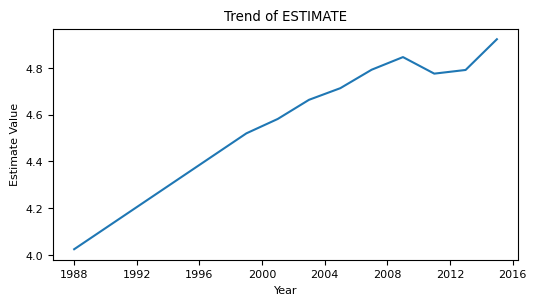

Selected variables: ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.679283580379873
Selected variables: ['YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.6793109785076816
Selected variables: ['UNIT', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.7475057275080474
Selected variables: ['UNIT', 'YEAR', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.7067408633711665
Selected variables: ['UNIT', 'YEAR', 'AGE', 'IS_ADULT']
Mean Squared Error: 3.8528003948181624
Selected variables: ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive']
Mean Squared Error: 3.679283670900506
Selected variables: ['AGE', 'YEAR', 'STUB_LABEL_Derive']
Mean Squared Error: 3.679305714183568


In [512]:
plt.figure(figsize=(6, 3))
plt.plot(ts_data['ESTIMATE_sqrt'])
plt.title('Trend of ESTIMATE')
plt.xlabel('Year')
plt.ylabel('Estimate Value')
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

pre_data_ln = pre_data
pre_data_ln['YEAR'] = pd.to_datetime(pre_data['YEAR_proxy']).dt.year
pre_data_ln = pre_data_ln.drop(columns=['ESTIMATE','INFO','YEAR_proxy']) 

def diff_set(data, variables):
   variables.append('ESTIMATE_sqrt')
   data = data[variables]
   X = data.drop(columns=['ESTIMATE_sqrt']) 
   X = pd.get_dummies(X)
   y = data['ESTIMATE_sqrt']

   model = LinearRegression()
   model.fit(X, y)
   y_pred = model.predict(X)

   mse = mean_squared_error(y, y_pred)
   print("Mean Squared Error:", mse)

variable_sets = [
    ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'], # whole variables
    ['YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'AGE', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive'],
    ['AGE', 'YEAR', 'STUB_LABEL_Derive'],
]

for selected_variables in variable_sets:
    print(f"Selected variables: {selected_variables}")
    diff_set(pre_data, selected_variables)


warnings.resetwarnings()

In [513]:
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

def diff_set(data, variables):
   variables.append('ESTIMATE_sqrt')
   data = data[variables]
   X = data.drop(columns=['ESTIMATE_sqrt']) 
   X = pd.get_dummies(X)
   y = data['ESTIMATE_sqrt']
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25) #split

   model = LinearRegression()
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)

   mse = mean_squared_error(y_test, y_pred)
   print("Mean Squared Error:", mse)

variable_sets = [
    ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'], # whole variables
    ['YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'STUB_LABEL_Derive', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'AGE', 'IS_ADULT'],
    ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive'],
    ['AGE', 'YEAR', 'STUB_LABEL_Derive'],
]

for selected_variables in variable_sets:
    print(f"Selected variables: {selected_variables}")
    diff_set(pre_data, selected_variables)

warnings.resetwarnings()

Selected variables: ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.667232636063257
Selected variables: ['YEAR', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.669769962189021
Selected variables: ['UNIT', 'AGE', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.853270890395544
Selected variables: ['UNIT', 'YEAR', 'STUB_LABEL_Derive', 'IS_ADULT']
Mean Squared Error: 3.695458345219914
Selected variables: ['UNIT', 'YEAR', 'AGE', 'IS_ADULT']
Mean Squared Error: 3.7707450989736837
Selected variables: ['UNIT', 'YEAR', 'AGE', 'STUB_LABEL_Derive']
Mean Squared Error: 3.6671907845087506
Selected variables: ['AGE', 'YEAR', 'STUB_LABEL_Derive']
Mean Squared Error: 3.66704129920052


## 7.1 Creating Logical Tests

<Figure size 800x300 with 0 Axes>

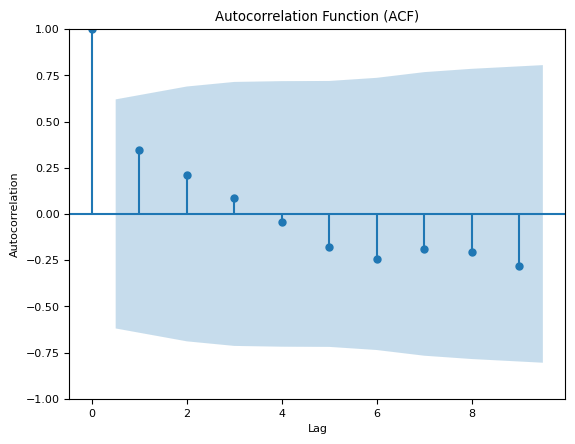

In [514]:
from statsmodels.graphics.tsaplots import plot_acf
ts_test_data = pre_data.groupby('YEAR_proxy')['ESTIMATE_sqrt'].mean().reset_index()
time_series = pd.Series(ts_test_data['ESTIMATE_sqrt'].values, index=pd.to_datetime(ts_test_data['YEAR_proxy']))

# ACF
plt.figure(figsize=(8, 3))
plot_acf(time_series, lags=9) 
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

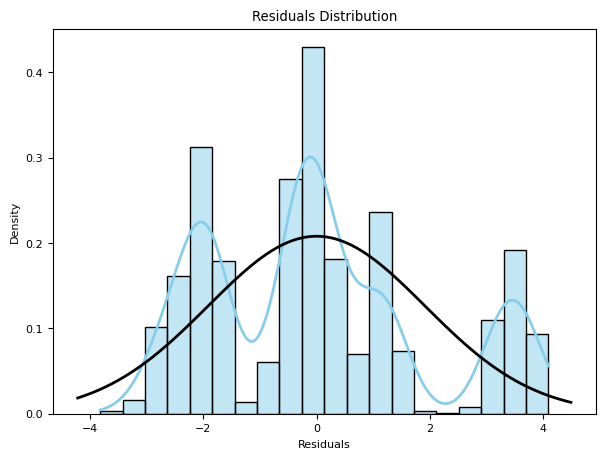

In [515]:
from scipy import stats
warnings.filterwarnings("ignore")
X = pre_data_ln.drop(columns=['ESTIMATE_sqrt']) 
X = pd.get_dummies(X)
y = pre_data_ln['ESTIMATE_sqrt']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, stat='density', color='skyblue', line_kws={'linewidth': 2})
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2)

plt.show()
warnings.resetwarnings()

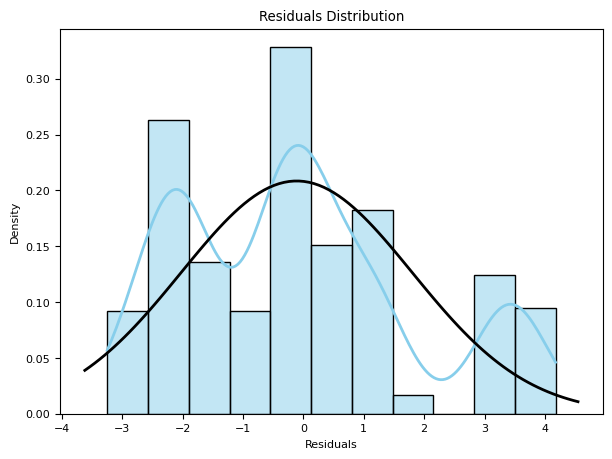

In [516]:
warnings.filterwarnings("ignore")
X = pre_data_ln.drop(columns=['ESTIMATE_sqrt','UNIT','IS_ADULT']) 
X = pd.get_dummies(X)
y = pre_data_ln['ESTIMATE_sqrt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25) #split

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, stat='density', color='skyblue', line_kws={'linewidth': 2})
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2)

plt.show()
warnings.resetwarnings()

## 7.2 Conducting Data Mining

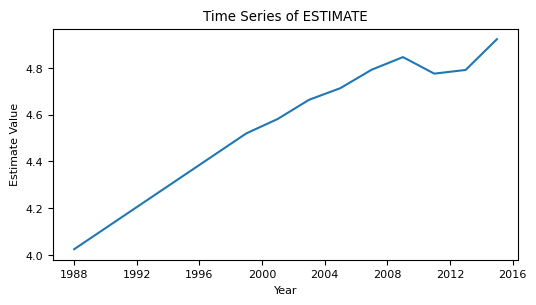

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


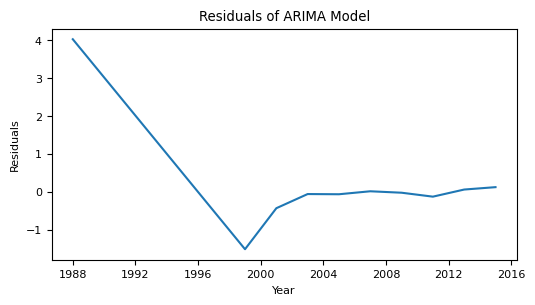

In [517]:
plt.figure(figsize=(6, 3))
plt.plot(ts_data['ESTIMATE_sqrt'])
plt.title('Time Series of ESTIMATE')
plt.xlabel('Year')
plt.ylabel('Estimate Value')
plt.show()

model = ARIMA(ts_data['ESTIMATE_sqrt'], order=(0, 2, 2)) 
model_fit = model.fit()
ts_info = model_fit.summary()

residuals = model_fit.resid
plt.figure(figsize=(6, 3))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


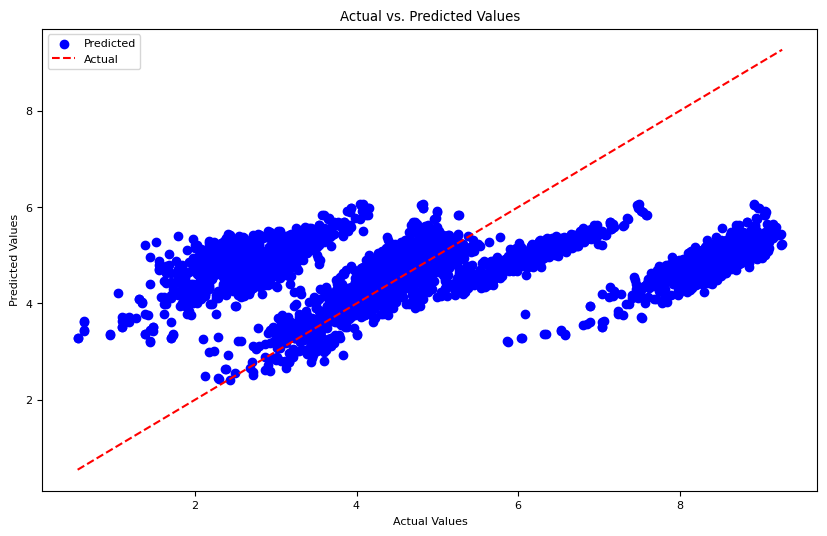

In [518]:
warnings.filterwarnings("ignore")
X = pre_data_ln.drop(columns=['ESTIMATE_sqrt']) 
X = pd.get_dummies(X)
y = pre_data_ln['ESTIMATE_sqrt']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
md_cha = model

# visualize
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted')  
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Actual')  
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#model info
ln_cha_coeff = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
ln_cha_inter = model.intercept_
ln_cha_r2 = model.score(X, y)

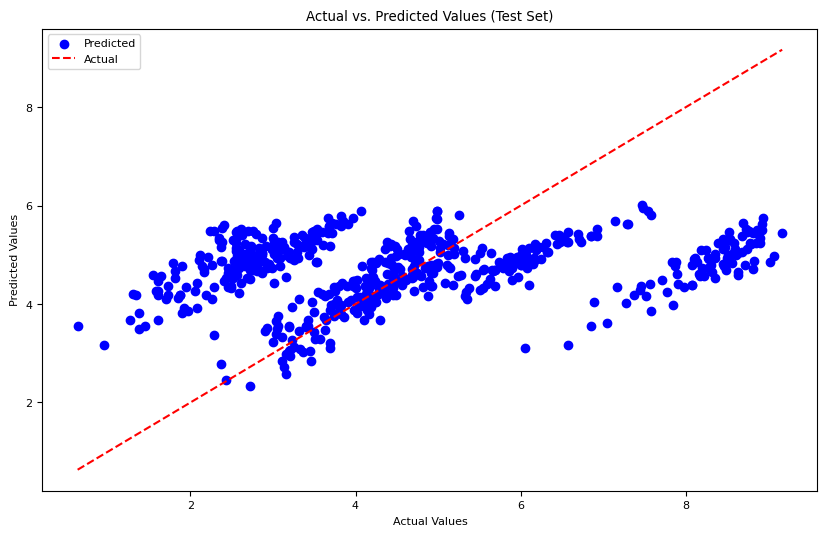

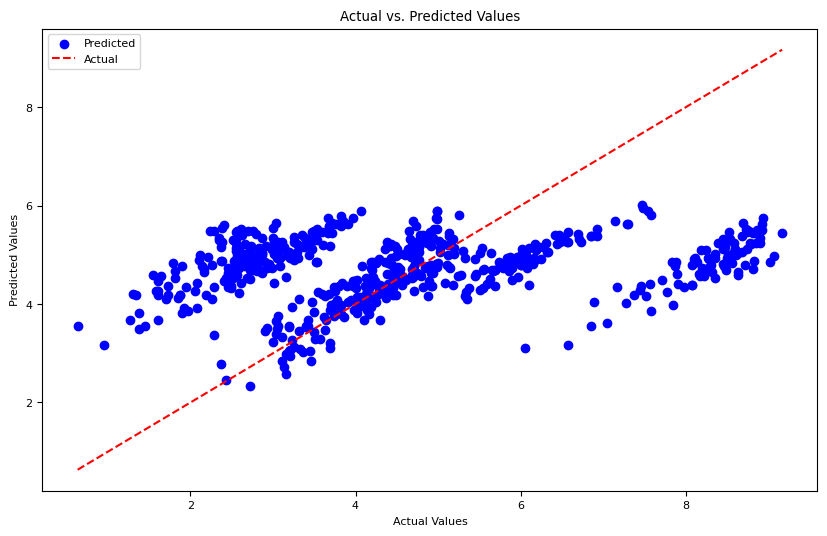

In [521]:
X = pre_data_ln.drop(columns=['ESTIMATE_sqrt','UNIT','IS_ADULT']) 
X = pd.get_dummies(X)
y = pre_data_ln['ESTIMATE_sqrt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25) #split

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
md_pred = model

#visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # 绘制预测值
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Actual')  # 绘制对角线（实际值）
plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#model info
ln_pred_coeff = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
ln_pred_inter = model.intercept_
ln_pred_r2 = model.score(X, y)

## 7.3 Searching for Patterns

In [495]:
print(ts_info)

                               SARIMAX Results                                
Dep. Variable:          ESTIMATE_sqrt   No. Observations:                   10
Model:                 ARIMA(0, 2, 2)   Log Likelihood                   2.923
Date:                Fri, 03 May 2024   AIC                              0.154
Time:                        11:18:29   BIC                              0.392
Sample:                             0   HQIC                            -1.454
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2067      1.168     -0.177      0.860      -2.496       2.083
ma.L2         -0.0518      0.903     -0.057      0.954      -1.822       1.719
sigma2         0.0280      0.016      1.749      0.0

In [496]:
ln_cha_coeff.to_csv("cha_coeff.csv", index=False)
print("Coefficients:\n", ln_cha_coeff)
print("Intercept:", ln_cha_inter)
print("R^2 Score:", ln_cha_r2)

Coefficients:
                                               Feature   Coefficient
0                                                YEAR  3.659973e-02
1            UNIT_Percent of population, age-adjusted  1.628929e+10
2                   UNIT_Percent of population, crude  1.628929e+10
3                                     AGE_12-19 years  2.037712e+10
4                                      AGE_2-19 years  2.037712e+10
5                                       AGE_2-5 years  2.037712e+10
6                               AGE_20 years and over -1.180281e+10
7                                     AGE_20-34 years -1.703454e+10
8                                     AGE_35-44 years -1.590967e+10
9                                     AGE_45-54 years -1.781088e+10
10                                    AGE_55-64 years -1.457084e+10
11                                     AGE_6-11 years  2.037712e+10
12                                    AGE_65-74 years -1.428343e+10
13                              A

In [497]:
ln_pred_coeff.to_csv("pred_coeff.csv", index=False)
print("Coefficients:\n", ln_pred_coeff)
print("Intercept:", ln_pred_inter)
print("R^2 Score:", ln_pred_r2)

Coefficients:
                                               Feature   Coefficient
0                                                YEAR  3.272924e-02
1                                     AGE_12-19 years  5.177120e+11
2                                      AGE_2-19 years  5.177120e+11
3                                       AGE_2-5 years  5.177120e+11
4                               AGE_20 years and over  5.177120e+11
5                                     AGE_20-34 years  3.148059e+11
6                                     AGE_35-44 years  4.273390e+11
7                                     AGE_45-54 years  3.715750e+11
8                                     AGE_55-64 years  9.890282e+11
9                                      AGE_6-11 years  5.177120e+11
10                                    AGE_65-74 years  1.587438e+11
11                              AGE_75 years and over  2.808663e+11
12                 STUB_LABEL_Derive_Age: 12-19 years  8.637209e+10
13                   STUB_LABEL_D